In [1]:
%tensorflow_version 2.x

In [2]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
def build_model(my_learning_rate):
  model=tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1,input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),loss="mean_squared_error",
                                                      metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

In [4]:
def train_model(model,feature,label,epochs,batch_size):
  history=model.fit(x=feature,y=label,batch_size=batch_size,epochs=epochs)
  trained_weight=model.get_weights()[0]
  trained_bias=model.get_weights()[1]
  epochs=history.epoch
  hist=pd.DataFrame(history.history)
  rmse=hist["root_mean_squared_error"]
  return trained_weight,trained_bias,epochs,rmse

In [24]:
def plot_the_model(trained_weight,trained_bias,feature,label):
  plt.xlabel("feature")
  plt.ylabel("label")
  plt.scatter(feature,label)
  x0=0
  y0=trained_bias
  x1=my_feature[-1]
  y1=trained_bias + (trained_weight*x1)
  plt.plot([x0,x1],[y0,y1],c="r")
  
  plt.show()

In [6]:
def plot_the_loss_curve(epochs,rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")
  plt.plot(epochs,rmse,label="Loss")
  plt.legend()
  plt.ylim(rmse.min()*0.97,rmse.max())
  plt.show()

In [17]:
my_feature = ([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0])
my_label = ([5.0,8.8,9.6,14.2,18.8,19.5,21.4,26.8,28.9,32.0,33.8,38.2])

Epoch 1/10
1/1 [==============================] - 0s 1ms/step - loss: 396.1185 - root_mean_squared_error: 19.9027
Epoch 2/10
1/1 [==============================] - 0s 1ms/step - loss: 385.8056 - root_mean_squared_error: 19.6419
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 378.4554 - root_mean_squared_error: 19.4539
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 372.3786 - root_mean_squared_error: 19.2971
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 367.0409 - root_mean_squared_error: 19.1583
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 362.1947 - root_mean_squared_error: 19.0314
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 357.7025 - root_mean_squared_error: 18.9130
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 353.4789 - root_mean_squared_error: 18.8010
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 349.4665 - root_me

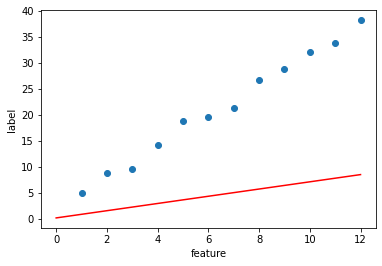

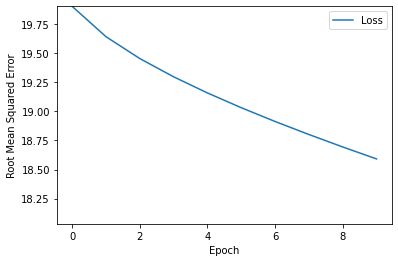

In [25]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight,trained_bias,epochs,rmse=train_model(my_model,my_feature,my_label,epochs,my_batch_size)
plot_the_model(trained_weight,trained_bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 189.5983 - root_mean_squared_error: 13.7695
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 182.4941 - root_mean_squared_error: 13.5090
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 177.4716 - root_mean_squared_error: 13.3218
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 173.3433 - root_mean_squared_error: 13.1660
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 169.7347 - root_mean_squared_error: 13.0282
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 166.4728 - root_mean_squared_error: 12.9024
Epoch 7/500
1/1 [==============================] - 0s 1ms/step - loss: 163.4612 - root_mean_squared_error: 12.7852
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 160.6402 - root_mean_squared_error: 12.6744
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 157.9700 

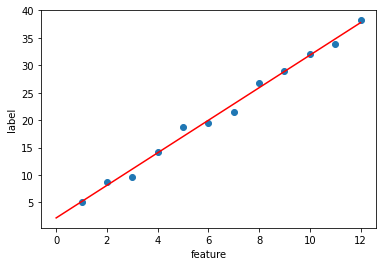

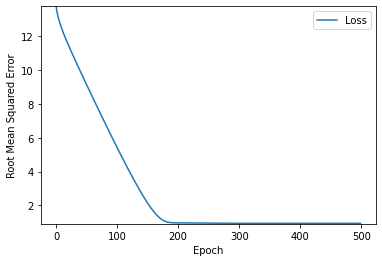

In [28]:
# Increasing the Epochs
learning_rate=0.01
epochs=500
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight,trained_bias,epochs,rmse=train_model(my_model,my_feature,my_label,epochs,my_batch_size)
plot_the_model(trained_weight,trained_bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

Epoch 1/500
1/1 [==============================] - 0s 2ms/step - loss: 953.1531 - root_mean_squared_error: 30.8732
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 6656526.0000 - root_mean_squared_error: 2580.0244
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 942.8128 - root_mean_squared_error: 30.7053
Epoch 4/500
1/1 [==============================] - 0s 1ms/step - loss: 5.5483 - root_mean_squared_error: 2.3555
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 1.4147 - root_mean_squared_error: 1.1894
Epoch 6/500
1/1 [==============================] - 0s 1ms/step - loss: 1.3235 - root_mean_squared_error: 1.1505
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 1.2928 - root_mean_squared_error: 1.1370
Epoch 8/500
1/1 [==============================] - 0s 1ms/step - loss: 1.2643 - root_mean_squared_error: 1.1244
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 1.2365 - root_mean

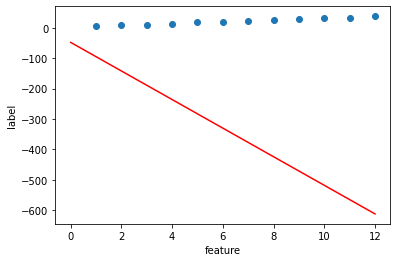

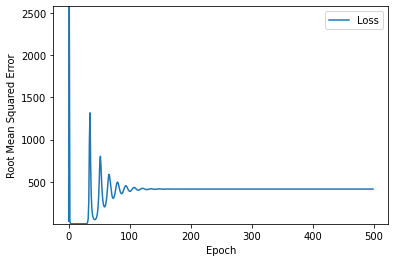

In [30]:
# Increasing the Learning Rate
learning_rate=100
epochs=500
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight,trained_bias,epochs,rmse=train_model(my_model,my_feature,my_label,epochs,my_batch_size)
plot_the_model(trained_weight,trained_bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)

Find the ideal combination of epochs and learning rate

Assign values to the following two hyperparameters to make training converge as efficiently as possible:

* learning_rate

* epochs

Epoch 1/70
1/1 [==============================] - 0s 1ms/step - loss: 1267.3955 - root_mean_squared_error: 35.6005
Epoch 2/70
1/1 [==============================] - 0s 1ms/step - loss: 1020.6932 - root_mean_squared_error: 31.9483
Epoch 3/70
1/1 [==============================] - 0s 2ms/step - loss: 866.6636 - root_mean_squared_error: 29.4391
Epoch 4/70
1/1 [==============================] - 0s 1ms/step - loss: 751.4504 - root_mean_squared_error: 27.4126
Epoch 5/70
1/1 [==============================] - 0s 1ms/step - loss: 658.7643 - root_mean_squared_error: 25.6664
Epoch 6/70
1/1 [==============================] - 0s 1ms/step - loss: 581.2184 - root_mean_squared_error: 24.1085
Epoch 7/70
1/1 [==============================] - 0s 4ms/step - loss: 514.7521 - root_mean_squared_error: 22.6882
Epoch 8/70
1/1 [==============================] - 0s 1ms/step - loss: 456.8608 - root_mean_squared_error: 21.3743
Epoch 9/70
1/1 [==============================] - 0s 1ms/step - loss: 405.8750 - root_

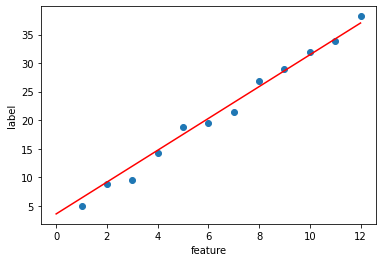

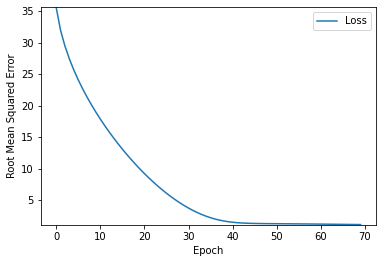

In [41]:
learning_rate=0.14
epochs=70
my_batch_size=12

my_model=build_model(learning_rate)
trained_weight,trained_bias,epochs,rmse=train_model(my_model,my_feature,my_label,epochs,my_batch_size)
plot_the_model(trained_weight,trained_bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)


Epoch 1/100
12/12 [==============================] - 0s 1ms/step - loss: 554.0728 - root_mean_squared_error: 23.5388
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 359.4208 - root_mean_squared_error: 18.9584
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 245.7147 - root_mean_squared_error: 15.6753
Epoch 4/100
12/12 [==============================] - 0s 940us/step - loss: 154.6296 - root_mean_squared_error: 12.4350
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 88.0724 - root_mean_squared_error: 9.3847
Epoch 6/100
12/12 [==============================] - 0s 998us/step - loss: 44.7613 - root_mean_squared_error: 6.6904
Epoch 7/100
12/12 [==============================] - 0s 1ms/step - loss: 17.7872 - root_mean_squared_error: 4.2175
Epoch 8/100
12/12 [==============================] - 0s 1ms/step - loss: 5.6250 - root_mean_squared_error: 2.3717
Epoch 9/100
12/12 [==============================] - 0s 963us/step - 

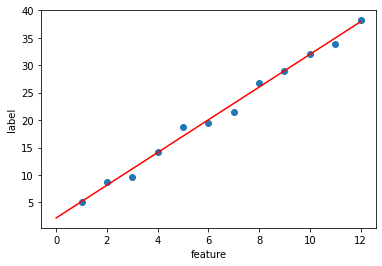

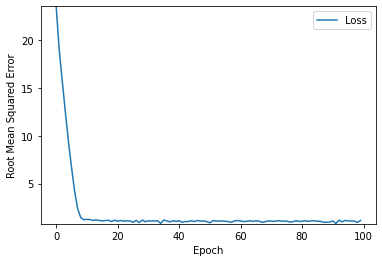

In [45]:
# Adjust the batch size
learning_rate=0.05
epochs=100
my_batch_size=1

my_model=build_model(learning_rate)
trained_weight,trained_bias,epochs,rmse=train_model(my_model,my_feature,my_label,epochs,my_batch_size)
plot_the_model(trained_weight,trained_bias,my_feature,my_label)
plot_the_loss_curve(epochs,rmse)


## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero. 
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory. 

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.